SECTION 1: Setting Up the Environment

In [1]:
import pandas as pd
import spacy
import gzip
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import plotly.express as px
from dash import Dash, dcc, html, Input, Output, dash_table

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

SECTION 2: Data Collection 

In [2]:
# Load the compressed CSV file into a DataFrame
tweet_df = pd.read_csv("0401_UkraineCombinedTweetsDeduped.csv.gzip", compression="gzip", low_memory=False)

print(tweet_df.head())

   Unnamed: 0               userid         username  \
0           0             16882774          Yaniela   
1           1           3205296069         gregffff   
2           2  1235940869812809728  ThanapornThon17   
3           3  1347985375566966784   I_Protest_2021   
4           4  1505394816636846083     Marsh_Win_01   

                                            acctdesc                location  \
0  Animal lover, supports those who fight injusti...                  Hawaii   
1                                                NaN                     NaN   
2                            เล่นไวโอลิน\nพูดภาษาจีน                     NaN   
3  01000001 01101110 01101111 01101110 01111001 0...  International Web Zone   
4  🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...          Hunter Account   

   following  followers  totaltweets               usercreatedts  \
0       1158        392        88366  2008-10-21 07:34:04.000000   
1        122        881        99853  2015-04-25 11:

SECTION 3: Data Cleaning and Preprocessing

In [3]:
""" We put the id and the text of each tweet in a dictionnary """
import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Dictionary to store preprocessed tweets
tweets_dict = dict()

# Preprocess and populate the dictionary
for row in range(tweet_df.shape[0]):
    tweet_id = tweet_df.iloc[row][9]
    tweet_text = tweet_df.iloc[row][12]
    
    # Process the text with SpaCy
    doc = nlp(tweet_text)
    
    # Preprocess: Remove stop words, punctuations, and lemmatize
    processed_text = " ".join(
        token.lemma_ for token in doc 
        if not token.is_stop and not token.is_punct
    )
    
    # Update the dictionary with the preprocessed text
    tweets_dict[tweet_id] = processed_text




C:\Users\lisob\AppData\Local\Temp\ipykernel_43372\1618868491.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tweet_id = tweet_df.iloc[row][9]
C:\Users\lisob\AppData\Local\Temp\ipykernel_43372\1618868491.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tweet_text = tweet_df.iloc[row][12]


In [4]:
# Print the first 20 preprocessed tweets
for i, (tweet_id, tweet_text) in enumerate(tweets_dict.items()):
    if i >= 20:  # Stop after 20
        break
    print(f"{tweet_id}: {tweet_text}")

1509681950042198030: ⚡ Ukrainian Air Force like address misinformation publish multiple western medium outlet situation 🇺 🇦 sky support @NATO ally 
 🧵 1/16 
 protectuаsky StopRussia UkraineUnderAttaсk
1509681950151348229: Chernihiv oblast ukrainian welcome liberator russianinvasion 

 standwithukraine️ ukraineunderattack ukrainewillwin PutinIsaWarCriminal StopPutin RussianUkrainianWar russiagohome РоссияСмотри нетвойне https://t.co/86ixyuetnb
1509681950683926556: America 🇺 🇸 prepare bad RussianUkrainianWar Taiwan 🇹 🇼 month enter new cold war Russia 🇷 🇺 good policy future 🇺 🇸 🇨 🇳 relation Taiwan 

 Video 👇 
 https://t.co/w58kdpqsly 

 China Taiwan
1509681951116046336: Anonymous hack amp release 62,000 email Marathon Group russian investment firm own oligarch Alexander Vinokurov currently EU sanction Vinokurov son law russian Foreign Minister Lavrov OpRussia 
 ddosecrets https://t.co/kATuo2CxC1
1509681951304990720: public MINT live 

 
 @billionaire_wmn 

 win $ 100,000 public sale mint 


SECTION 4: Exploratory Data Analysis

Descriptive Statistics

In [5]:
# Retain rows with unique usernames and maximum followers
unique_users_df_fol = tweet_df.iloc[tweet_df.groupby('username')['followers'].idxmax()]
# Retain rows with unique usernames and maximum followers
unique_users_df_tweets = tweet_df.iloc[tweet_df.groupby('username')['totaltweets'].idxmax()]

# Descriptive statistics for numeric columns
numeric_cols = ['following', 'followers', 'totaltweets']
print("Descriptive Statistics for Numeric Columns:")
print(unique_users_df_fol[numeric_cols].describe())

# Top users by number of followers
print("\nTop Users by Number of Followers:")
print(unique_users_df_fol[['username', 'followers']].sort_values(by='followers', ascending=False).head(10))

# Top users by number of tweets
print("\nTop Users by Number of Tweets:")
print(unique_users_df_tweets[['username', 'totaltweets']].sort_values(by='totaltweets', ascending=False).head(10))

Descriptive Statistics for Numeric Columns:
           following     followers   totaltweets
count  166400.000000  1.664000e+05  1.664000e+05
mean     1628.199050  7.125212e+03  3.962964e+04
std      5056.336262  1.439683e+05  9.253716e+04
min         0.000000  0.000000e+00  0.000000e+00
25%       172.000000  6.300000e+01  1.803000e+03
50%       563.000000  3.140000e+02  9.361000e+03
75%      1669.000000  1.330000e+03  3.663275e+04
max    483332.000000  1.695393e+07  4.034722e+06

Top Users by Number of Followers:
            username  followers
199373          ndtv   16953926
352392        aajtak   16769239
212591            UN   15234935
219257  timesofindia   14351856
19391   CGTNOfficial   13382246
262691       ABPNews   12436431
158490        XHNews   12307582
205849           WHO   10839875
196839      TimesNow   10221578
337135     lemondefr    9925974

Top Users by Number of Tweets:
               username  totaltweets
312498         PulpNews      4035049
361334       zazoomblo

Account longevity statistics

In [6]:
# Calculate account age in days
tweet_df['account_age_days'] = (pd.to_datetime(tweet_df['extractedts']) - pd.to_datetime(tweet_df['usercreatedts'])).dt.days
print(f"Mean account age: {tweet_df['account_age_days'].mean()} days")
print(f"Median account age: {tweet_df['account_age_days'].median()} days")

Mean account age: 2174.0899760191846 days
Median account age: 2112.0 days


Plotting Tweet Frequencies Over Time

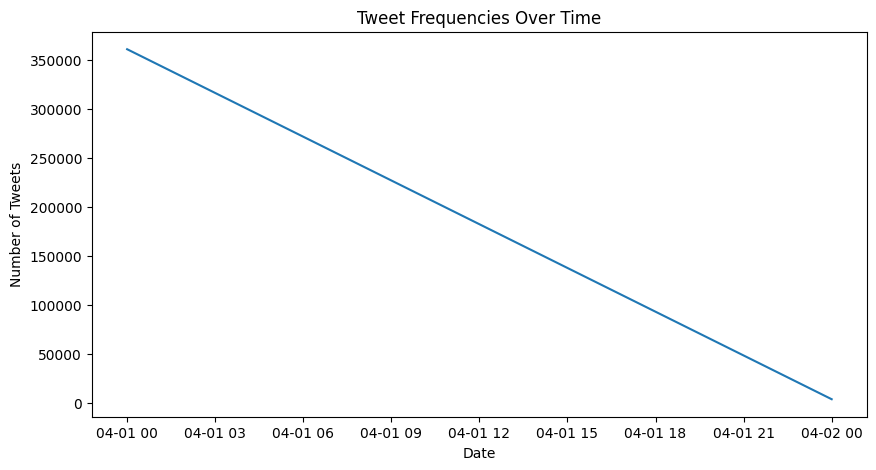

In [7]:
# Convert extractedts to datetime
tweet_df['extractedts'] = pd.to_datetime(tweet_df['extractedts'], errors='coerce')

# Group by date and count tweets
tweets_by_date = tweet_df.groupby(tweet_df['extractedts'].dt.date).size()

# Plot tweet frequencies over time
tweets_by_date.plot( figsize=(10, 5), title='Tweet Frequencies Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

Top Hashtags

Top 10 Hashtags:
hashtags
Ukraine             164552
Russia               57514
StandWithUkraine     44944
Putin                31359
Kyiv                 19329
UkraineRussiaWar     19106
Russian              17148
StopRussia           17051
Mariupol             16106
UkraineWar           11893
Name: count, dtype: int64


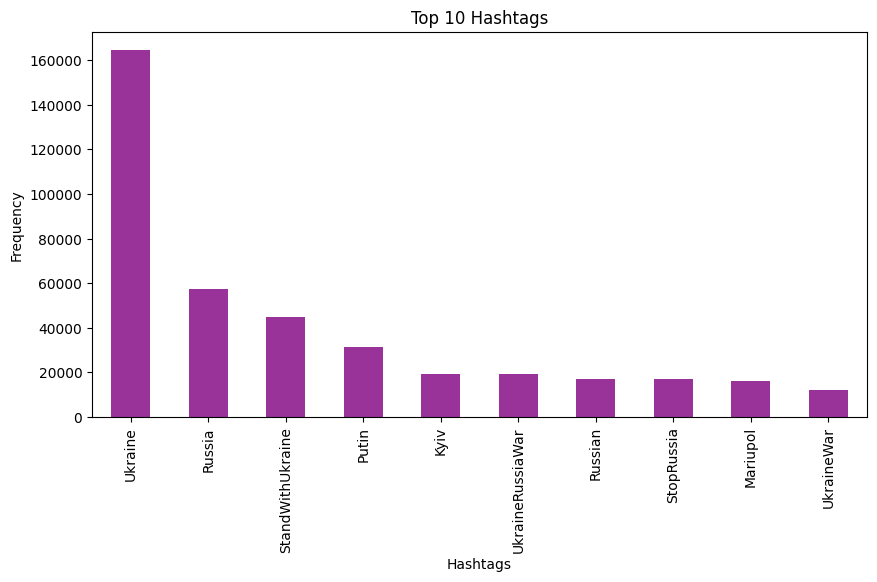

In [8]:
# Example: Extract hashtags from tweet text
tweet_df['hashtags'] = tweet_df['text'].str.findall(r"#(\w+)")
all_hashtags = tweet_df['hashtags'].explode().dropna()

# Top 10 hashtags
top_hashtags = all_hashtags.value_counts().head(10)
print("Top 10 Hashtags:")
print(top_hashtags)

# Visualize top hashtags
top_hashtags.plot(kind='bar', figsize=(10, 5), color='purple', alpha=0.8)
plt.title("Top 10 Hashtags")
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.show()

Visualize distributions for followers, following, and totaltweets.

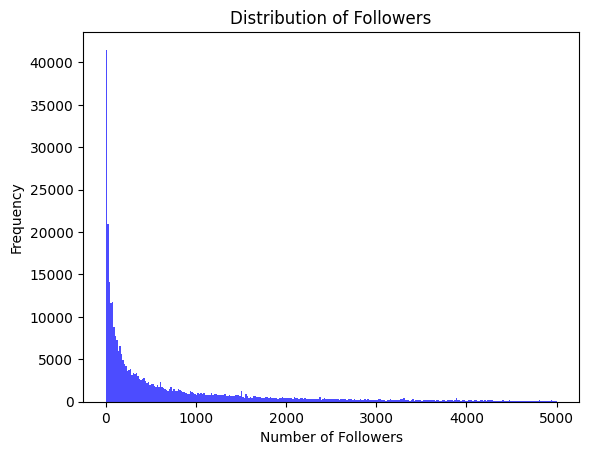

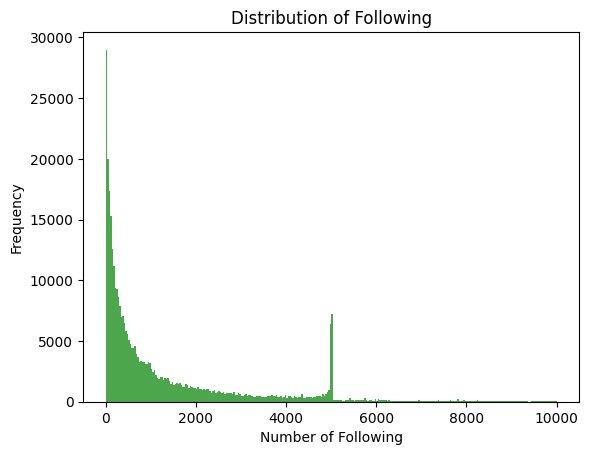

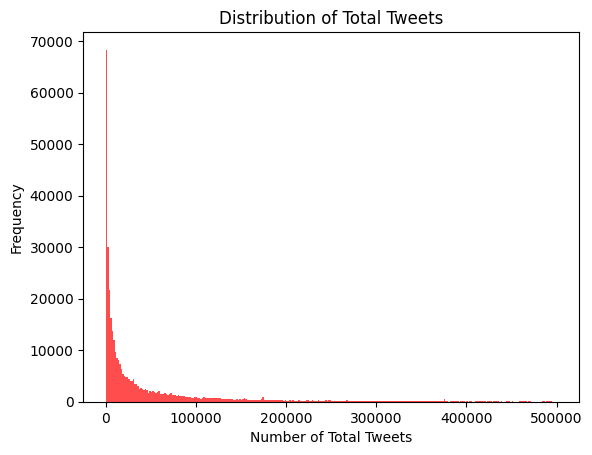

In [9]:
# Followers histogram
plt.hist(tweet_df['followers'], bins=300, range=(0,5000), color='blue', alpha=0.7)
plt.title("Distribution of Followers")
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.show()

# Following histogram
plt.hist(tweet_df['following'], bins=300, range=(0,10000), color='green', alpha=0.7)
plt.title("Distribution of Following")
plt.xlabel("Number of Following")
plt.ylabel("Frequency")
plt.show()

# Total tweets histogram
plt.hist(tweet_df['totaltweets'], bins=300, range=(0,500000), color='red', alpha=0.7)
plt.title("Distribution of Total Tweets")
plt.xlabel("Number of Total Tweets")
plt.ylabel("Frequency")
plt.show()


Retweets vs. Followers:

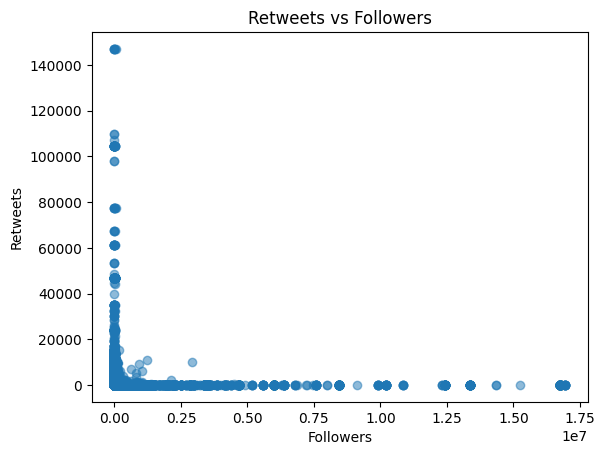

In [10]:
# Scatter plot of retweets vs followers
plt.scatter(tweet_df['followers'], tweet_df['retweetcount'], alpha=0.5)
plt.title("Retweets vs Followers")
plt.xlabel("Followers")
plt.ylabel("Retweets")
plt.show()


SECTION 5: Sentiment Analysis

In [11]:
# Add a column for the sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Categorize tweets into positive, neutral, and negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

#Create a new dict for stocking the result about the sentiments
sentiment_dict = dict()

# Apply sentiment analysis to the tweet text
for (tweet_id, tweet_text) in tweets_dict.items():
    sentiment = get_sentiment(tweet_text)
    sentiment_dict[tweet_id] = categorize_sentiment(sentiment)


In [12]:
# Display the first few rows to inspect the sentiment analysis results
for i, (key, value) in enumerate(sentiment_dict.items()):
    if i == 5:  # Limit to the first 5 items
        break
    print(f"{key}: {value}")


1509681950042198030: neutral
1509681950151348229: positive
1509681950683926556: negative
1509681951116046336: positive
1509681951304990720: positive


In [13]:
#function to get the text of a tweet and the assoicated emotion
def tweet_sentiment(tweet_id):
    for row in range(tweet_df.shape[0]):
        if tweet_id == tweet_df.iloc[row][9]:
            tweet_text = tweet_df.iloc[row][12]
            break
    
    print( "\nTweet id: "+str(tweet_id)+"\nTweet text: +"+tweet_text+"\nSentiment: "+sentiment_dict[tweet_id])

In [14]:
tweet_id = 1509681950042198030
tweet_sentiment(tweet_id)


Tweet id: 1509681950042198030
Tweet text: +⚡The Ukrainian Air Force would like to address misinformation published in multiple Western media outlets regarding the situation in the 🇺🇦 sky and support from our @NATO allies. 
More in 🧵(1/16)
#ProtectUАSky #StopRussia #UkraineUnderAttaсk
Sentiment: neutral


C:\Users\lisob\AppData\Local\Temp\ipykernel_43372\2044246348.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tweet_id == tweet_df.iloc[row][9]:
C:\Users\lisob\AppData\Local\Temp\ipykernel_43372\2044246348.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tweet_text = tweet_df.iloc[row][12]


SECTION 6: Advanced NLP Techniques+

Named Entity Recognition (NER) and Part-of-Speech (POS) Tagging

In [15]:
# Dictionary to store NER results
ner_results = {}

# Dictionary to store POS tagging results
pos_results = {}

for tweet_id, processed_text in tweets_dict.items():
    # Process the text with SpaCy
    doc = nlp(processed_text)
    
    # Extract named entities (text and label)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    # Store results in the dictionary
    ner_results[tweet_id] = entities

    # Extract words and their POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    # Store results in the dictionary
    pos_results[tweet_id] = pos_tags


# Display NER results for the first 5 tweets
print("\n")
for tweet_id, entities in list(ner_results.items())[:5]:
    print(f"Tweet ID: {tweet_id}")
    print(f"Entities: {entities}")
    print("-" * 50)

# Display POS tagging results for the first 5 tweets
print("\n")
for tweet_id, pos_tags in list(pos_results.items())[:5]:
    print(f"Tweet ID: {tweet_id}")
    print(f"POS Tags: {pos_tags}")
    print("-" * 50)



Tweet ID: 1509681950042198030
Entities: [('Air Force', 'ORG'), ('@NATO', 'ORG'), ('1/16 \n ', 'CARDINAL'), ('StopRussia', 'PERSON'), ('UkraineUnderAttaсk', 'PERSON')]
--------------------------------------------------
Tweet ID: 1509681950151348229
Entities: [('StopPutin', 'ORG'), ('РоссияСмотри', 'ORG')]
--------------------------------------------------
Tweet ID: 1509681950683926556
Entities: [('America', 'GPE'), ('🇸', 'NORP'), ('Taiwan', 'GPE'), ('month', 'DATE'), ('Russia', 'GPE'), ('Taiwan', 'GPE'), ('China', 'GPE'), ('Taiwan', 'GPE')]
--------------------------------------------------
Tweet ID: 1509681951116046336
Entities: [('62,000', 'CARDINAL'), ('Marathon Group', 'ORG'), ('russian', 'NORP'), ('Alexander Vinokurov', 'PERSON'), ('EU', 'ORG'), ('Vinokurov', 'ORG'), ('russian', 'NORP'), ('Lavrov OpRussia', 'PERSON')]
--------------------------------------------------
Tweet ID: 1509681951304990720
Entities: [('MINT', 'ORG'), ('100,000', 'MONEY'), ('https://t.co/qev7nrd3my', 'CARD

Named Entity Recognition (NER):

Entities Identified:
GPE: Geopolitical entities (e.g., countries, cities).
ORG: Organizations (e.g., UN, WHO).
DATE: Specific dates.
Use Cases: Identifying locations of events, key organizations, or temporal references.
Part-of-Speech (POS) Tagging:

POS Tags:
PROPN: Proper noun.
VERB: Verb.
ADJ: Adjective.

SECTION 8 : Visualizing Results

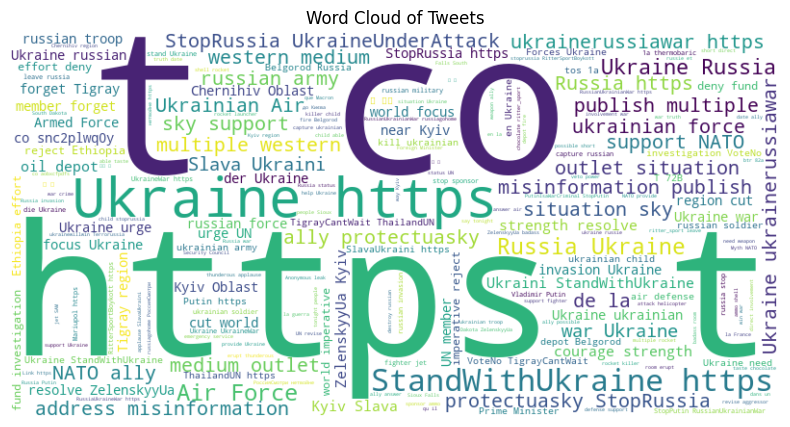

In [16]:
# Generate a word cloud from all tweets
all_tweets = " ".join(tweets_dict.values())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()


In [28]:
#Variables
sentiment_counts = Counter(sentiment_dict.values())
categories = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create a DataFrame for Plotly
sentiment_data = pd.DataFrame({
    'Sentiment': categories,
    'Count': counts
})

# Initialize the app
app1 = Dash(__name__)

# Prepare data
sentiment_data = pd.DataFrame({
    'Sentiment': categories,
    'Count': counts
})

# Create a bar chart
fig = px.bar(sentiment_data, x='Sentiment', y='Count', color='Sentiment', title='Sentiment Distribution')

# Define layout
app1.layout = html.Div(children=[
    html.H1("Sentiment Analysis Dashboard"),
    dcc.Graph(figure=fig)
])

# Run the app
if __name__ == '__main__':
    app1.run_server(debug=True, port=8050)


Generate csv report

In [24]:
# Generate summary statistics
summary = pd.DataFrame({
    'Metric': ['Total Tweets', 'Positive', 'Neutral', 'Negative'],
    'Count': [
        len(sentiment_dict),
        sentiment_counts.get('positive', 0),
        sentiment_counts.get('neutral', 0),
        sentiment_counts.get('negative', 0)
    ]
})

print(summary)

# Export to CSV or Excel
summary.to_csv("sentiment_summary.csv", index=False)


         Metric   Count
0  Total Tweets  364875
1      Positive   94177
2       Neutral  209966
3      Negative   60732


Filtering tweets, research engine

In [27]:
from dash import callback_context

# Prepare data for display
data = []
for row in range(tweet_df.shape[0]):
    tweet_id = tweet_df.iloc[row][9]
    tweet_text = tweet_df.iloc[row][12]
    sentiment = sentiment_dict[tweet_id]
    data.append({"Tweet ID": tweet_id, "Tweet Text": tweet_text, "Sentiment": sentiment})


df = pd.DataFrame(data)

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Interactive Tweet Explorer"),
    html.Label("Filter by Sentiment:"),
    dcc.Dropdown(
        id='sentiment-filter',
        options=[
            {'label': 'Positive', 'value': 'positive'},
            {'label': 'Neutral', 'value': 'neutral'},
            {'label': 'Negative', 'value': 'negative'}
        ],
        value=None,  # Default to no filter
        placeholder="Select sentiment"
    ),
    html.Br(),
    html.Label("Search by Keyword:"),
    dcc.Input(
        id='keyword-search',
        type='text',
        placeholder='Enter keyword...',
        debounce=True  # Triggers only when input is complete
    ),
    # Reset button
    html.Br(),
    html.Button("Reset Filters", id="reset-button", n_clicks=0, style={'margin-top': '10px'}),
    html.Br(),
    html.Br(),
    dash_table.DataTable(
        id='tweet-table',
        columns=[
            {'name': 'Tweet ID', 'id': 'Tweet ID'},
            {'name': 'Tweet Text', 'id': 'Tweet Text'},
            {'name': 'Sentiment', 'id': 'Sentiment'}
        ],
        style_table={'overflowX': 'auto'},
        style_header={'backgroundColor': 'rgb(230, 230, 230)', 'fontWeight': 'bold'},
        style_cell={'textAlign': 'left', 'whiteSpace': 'normal', 'overflowX': 'auto', 'maxWidth': '300px'},  # Adjust this to control max width
    )
])



@app.callback(
    Output('tweet-table', 'data'),
    Output('sentiment-filter', 'value'),
    Output('keyword-search', 'value'),
    Input('sentiment-filter', 'value'),
    Input('keyword-search', 'value'),
    Input('reset-button', 'n_clicks')
) 
#functin to filter tweets
def filter_tweets(sentiment_filter, keyword_search, reset_clicks):
    # Get the context of the triggered input
    ctx = callback_context
    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0] if ctx.triggered else None

    # Check if the reset button was clicked
    if triggered_id == 'reset-button':
        return df.to_dict('records'), None, ""

    # Apply filters
    filtered_df = df

    if sentiment_filter:
        filtered_df = filtered_df[filtered_df['Sentiment'] == sentiment_filter]

    if keyword_search:
        filtered_df = filtered_df[
            filtered_df['Tweet Text'].str.contains(keyword_search, case=False, na=False)
        ]

    return filtered_df.to_dict('records'), sentiment_filter, keyword_search


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True,port=8051)
